In [3]:
# Get stock data 
import pandas as pd
from datetime import datetime
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web

#### set time

In [11]:
start = datetime(2014,1,1)
end = datetime.now()

In [28]:
df = web.DataReader("BABA", "iex", start, end)

5y


In [25]:
df.index

Index(['2014-09-19', '2014-09-22', '2014-09-23', '2014-09-24', '2014-09-25',
       '2014-09-26', '2014-09-29', '2014-09-30', '2014-10-01', '2014-10-02',
       ...
       '2018-09-10', '2018-09-11', '2018-09-12', '2018-09-13', '2018-09-14',
       '2018-09-17', '2018-09-18', '2018-09-19', '2018-09-20', '2018-09-21'],
      dtype='object', name='date', length=1010)

#### set index and reset index(means let index as 0....n)

In [27]:
df.reset_index(inplace=True)
df.set_index('open',inplace=True)

#### data visualization

In [30]:
import matplotlib.pyplot as plt
from matplotlib import style

In [31]:
style.use('fivethirtyeight')

#### show close column

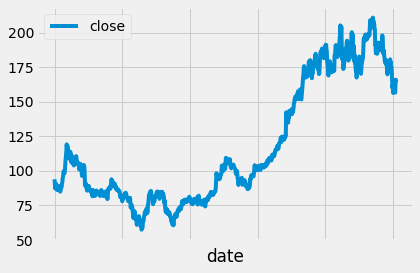

In [34]:
df['close'].plot()
plt.legend()
plt.show()

#### pandas basic 

In [36]:
web_stats = {'Day':[1,2,3,4,5,6],
             'Visitors':[43,34,65,56,29,76],
             'Bounce Rate':[65,67,78,65,45,52]}

In [37]:
df = pd.DataFrame(web_stats)

#### set index

In [43]:
df.set_index('Day',inplace=True)

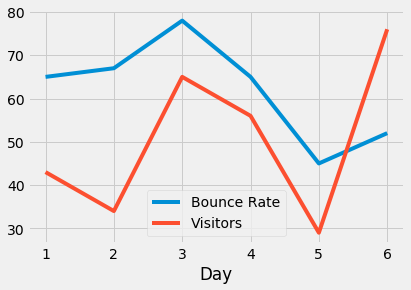

In [47]:
df.plot()
plt.show()

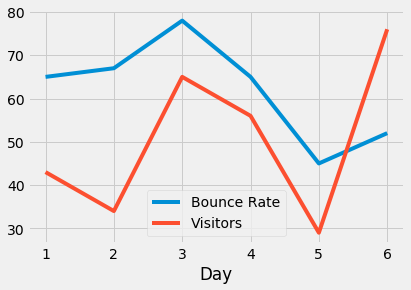

In [48]:
df.plot()
plt.legend()
plt.show()

#### load csv data

In [50]:
df = pd.read_csv('/Users/tianxiang/Downloads/SP500 2000.csv')

In [54]:
df.set_index('Date',inplace=True)

#### header and set header and when load data set index to one column

In [57]:
df = pd.read_csv('/Users/tianxiang/Downloads/SP500 2000.csv',index_col=0)

In [58]:
df.head()

,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Volume,Return,Direction
Date,,,,,,,,
1/11/2000,0.00483,0.01161,0.00041,0.00083,-0.01698,1014000000,-0.005710,DOWN
1/12/2000,-0.00571,0.00483,0.01161,0.00041,0.00083,974600000,-0.001909,DOWN
1/13/2000,-0.00191,-0.00571,0.00483,0.01161,0.00041,1030400000,0.005253,UP
1/14/2000,0.00525,-0.00191,-0.00571,0.00483,0.01161,1085900000,0.004610,UP
1/18/2000,0.00461,0.00525,-0.00191,-0.00571,0.00483,1056700000,-0.002977,DOWN


#### to html

In [62]:
df.to_html('SP500.html')

#### reset header

In [64]:
df.head()

,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Volume,Return,Direction
Date,,,,,,,,
1/11/2000,0.00483,0.01161,0.00041,0.00083,-0.01698,1014000000,-0.005710,DOWN
1/12/2000,-0.00571,0.00483,0.01161,0.00041,0.00083,974600000,-0.001909,DOWN
1/13/2000,-0.00191,-0.00571,0.00483,0.01161,0.00041,1030400000,0.005253,UP
1/14/2000,0.00525,-0.00191,-0.00571,0.00483,0.01161,1085900000,0.004610,UP
1/18/2000,0.00461,0.00525,-0.00191,-0.00571,0.00483,1056700000,-0.002977,DOWN


In [69]:
df.rename(columns={'Lag 1':'log'},inplace=True)

#### set columns name when load no name data

In [130]:
df.to_csv('test.csv',header=False)
df1 = pd.read_csv('test.csv',names =['Date','Dat1e','Dat2e','Da3te','Da4te','Dat5e','Dat6e','D9ate','Da0te',])

In [131]:
df1.head()

,Date,Dat1e,Dat2e,Da3te,Da4te,Dat5e,Dat6e,D9ate,Da0te
0,1/11/2000,0.00483,0.01161,0.00041,0.00083,-0.01698,1014000000,-0.005710,DOWN
1,1/12/2000,-0.00571,0.00483,0.01161,0.00041,0.00083,974600000,-0.001909,DOWN
2,1/13/2000,-0.00191,-0.00571,0.00483,0.01161,0.00041,1030400000,0.005253,UP
3,1/14/2000,0.00525,-0.00191,-0.00571,0.00483,0.01161,1085900000,0.004610,UP
4,1/18/2000,0.00461,0.00525,-0.00191,-0.00571,0.00483,1056700000,-0.002977,DOWN


In [128]:
df1.set_index('Date',inplace=True)

In [127]:
df1 = df1.iloc[:,:2]

#### change exact index and column names

In [155]:
df1[:5].rename({0:5},axis=0)
df1.rename(str.lower,axis=1)
df1.head()

,Date,Dat1e,Dat2e,Da3te,Da4te,Dat5e,Dat6e,D9ate,Da0te
0,1/11/2000,0.00483,0.01161,0.00041,0.00083,-0.01698,1014000000,-0.005710,DOWN
1,1/12/2000,-0.00571,0.00483,0.01161,0.00041,0.00083,974600000,-0.001909,DOWN
2,1/13/2000,-0.00191,-0.00571,0.00483,0.01161,0.00041,1030400000,0.005253,UP
3,1/14/2000,0.00525,-0.00191,-0.00571,0.00483,0.01161,1085900000,0.004610,UP
4,1/18/2000,0.00461,0.00525,-0.00191,-0.00571,0.00483,1056700000,-0.002977,DOWN


#### several major ways to combine data